## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Gross profits analysis

In [2]:
#Load dataset
df1 = pd.read_csv("bom.movie_gross.csv.gz") #CORE DATASET #Adonis
df1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#find null values
df1['domestic_gross'].isnull().value_counts()

False    3359
True       28
Name: domestic_gross, dtype: int64

In [4]:
df1['foreign_gross'].isnull().value_counts()

False    2037
True     1350
Name: foreign_gross, dtype: int64

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
#remove commas from values, convert to numeric
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '')
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'])
df1['foreign_gross'].head()        


0    652000000.0
1    691300000.0
2    664300000.0
3    535700000.0
4    513900000.0
Name: foreign_gross, dtype: float64

In [7]:
#remove null values from columns
df1.dropna(subset=['studio', 'domestic_gross', 'foreign_gross'], inplace=True)
df1.shape

(2007, 5)

In [8]:
#verification of null value deletion
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [9]:
#top ten studios with the most movies
df1['studio'].value_counts()[:10]

Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
Name: studio, dtype: int64

In [12]:
#studios with the most films
x = list(df1['studio'].value_counts()[:10].index)
x

['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']

In [13]:
#total gross for each film
df1['total_gross'] = df1['domestic_gross'] + df1['foreign_gross']
df1.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [14]:
# #Transform total_gross to billions, relabel column (might not be necessary, graphs are fine)
# df1['total_gross(in billions)'] = df1['total_gross']/1000000000
# df1.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross(in billions)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1.0670
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,1.0255
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,0.9603
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,0.8283
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,0.7526


In [15]:
#sort studio values (might be unnecessary)
dfm = df1.sort_values(by='studio')
dfm.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross(in billions)
155,Sea Rex 3D: Journey to a Prehistoric World,3D,6100000.0,9900000.0,2010,16000000.0,0.0160
2840,Lady Bird,A24,49000000.0,30000000.0,2017,79000000.0,0.0790
3151,Hereditary,A24,44100000.0,35300000.0,2018,79400000.0,0.0794
1640,A Most Violent Year,A24,5700000.0,6300000.0,2014,12000000.0,0.0120
2441,The Witch,A24,25100000.0,15300000.0,2016,40400000.0,0.0404


Text(0.5, 1.0, 'Top 10 Highest Grossing Studios (Domestic)')

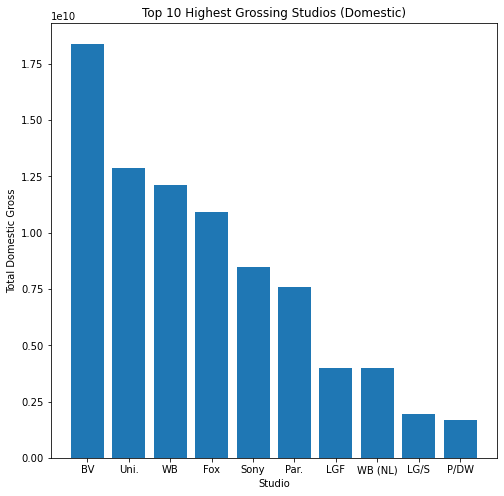

In [17]:
#top 10 domestic gross studios; combine WB and WB(NL)
dfm3 = dfm.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

x2 = dfm3.studio[:10]
y2 = dfm3.domestic_gross[:10]
plt.bar(x2, y2)
ax.set_xlabel('Studio')
ax.set_ylabel('Total Domestic Gross')
ax.set_title('Top 10 Highest Grossing Studios (Domestic)')

Text(0.5, 1.0, 'Top 10 Highest Grossing Studios (Foreign)')

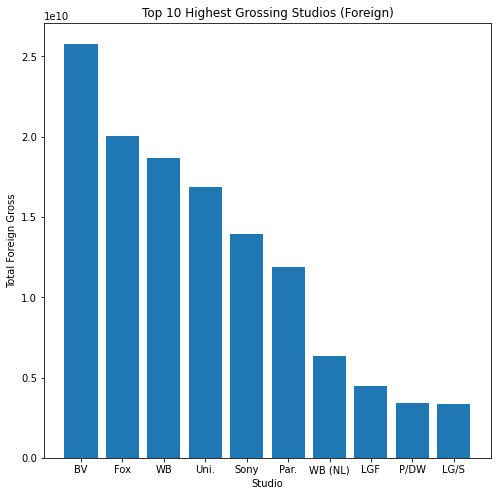

In [23]:
#top 10 foreign gross studios
dfm4 = dfm.groupby(['studio']).foreign_gross.sum().reset_index().sort_values(by='foreign_gross', ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

x3 = dfm4.studio[:10]
y3 = dfm4.foreign_gross[:10]
plt.bar(x3, y3)
ax.set_xlabel('Studio')
ax.set_ylabel('Total Foreign Gross')
ax.set_title('Top 10 Highest Grossing Studios (Foreign)')

Text(0.5, 1.0, 'Top 10 Highest Grossing Studios')

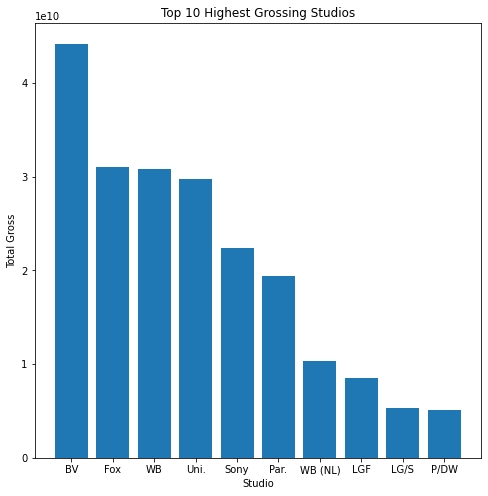

In [25]:
#top 10 total gross studios

dfm5 = dfm.groupby(['studio']).total_gross.sum().reset_index().sort_values(by='total_gross', ascending=False)

fig, ax = plt.subplots(figsize=(8,8))

x4 = dfm5.studio[:10]
y4 = dfm5.total_gross[:10]
plt.bar(x4, y4)
ax.set_xlabel('Studio')
ax.set_ylabel('Total Gross')
ax.set_title('Top 10 Highest Grossing Studios')

Text(0.5, 1.0, 'Total Domestic Gross for studio with most films')

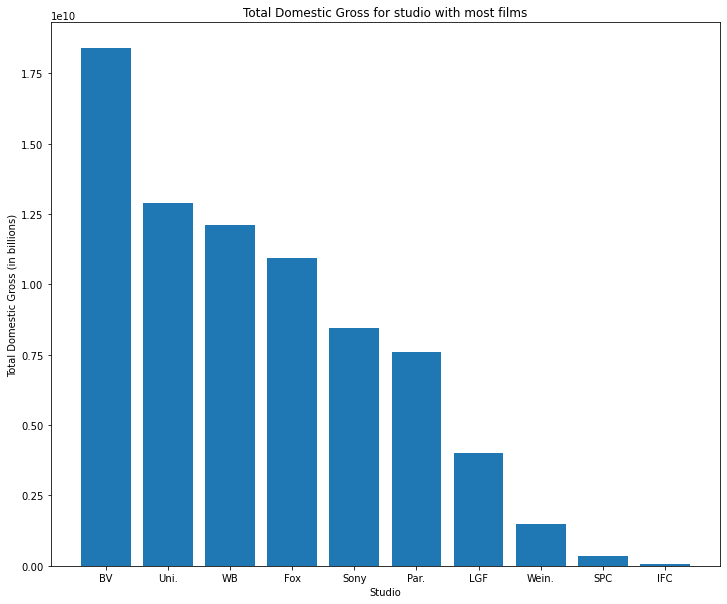

In [18]:
#domestic gross for studios with most films
x = ['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']
dfm2 = dfm.groupby(['studio']).domestic_gross.sum().reset_index().sort_values(by='domestic_gross', ascending=False)
d = dfm2[dfm2['studio'].isin(x)]

fig, ax = plt.subplots(figsize=(12,10))

x = d['studio']
y = d['domestic_gross']
plt.bar(x, y)
ax.set_xlabel("Studio")
ax.set_ylabel("Total Domestic Gross (in billions)")
ax.set_title('Total Domestic Gross for studio with most films')

In [19]:
#hard coding studios with most films (top 10) into a new df
x = ['Uni.', 'Fox', 'WB', 'Sony', 'BV', 'Par.', 'LGF', 'Wein.', 'IFC', 'SPC']
dfs = dfm[dfm['studio'].isin(x)]
dfs.shape

(994, 7)

In [20]:
#Isolating total gross per studio
dff = dfs.groupby(['studio']).total_gross.sum().reset_index()
dff.head(10)

,studio,total_gross
0,BV,4.419038e+10
1,Fox,3.098037e+10
2,IFC,4.698994e+08
3,LGF,8.467471e+09
4,Par.,1.944420e+10
5,SPC,1.287556e+09
6,Sony,2.240472e+10
7,Uni.,2.974681e+10
8,WB,3.079150e+10
9,Wein.,4.095903e+09


Text(0.5, 1.0, 'Total Worldwide Gross Profits for each studio')

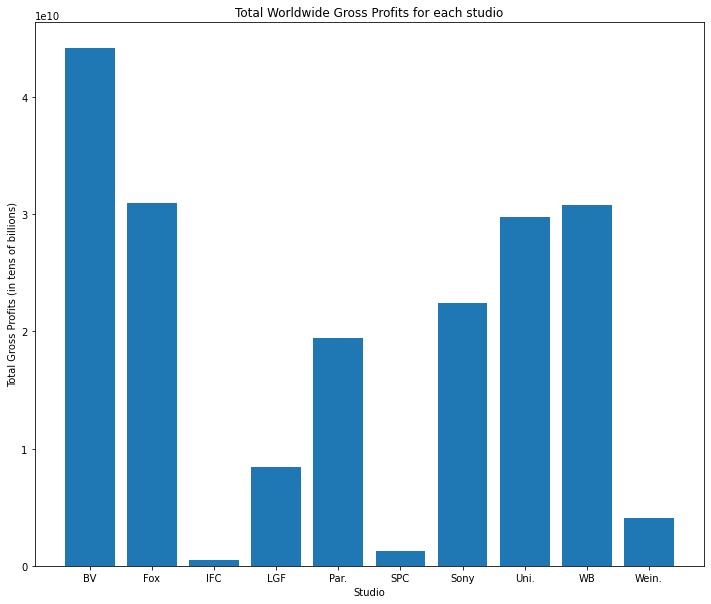

In [21]:
#initial visualization: total gross for each studio

fig, ax = plt.subplots(figsize=(12,10))

x = dff['studio']
y = dff['total_gross']
plt.bar(x, y)
ax.set_xlabel("Studio")
ax.set_ylabel("Total Gross Profits (in tens of billions)")
ax.set_title('Total Worldwide Gross Profits for each studio')

In [22]:
# #Domestic, foreign and total gross per studio all in one plot

# domesticgross = 
# foreigngross = 

SyntaxError: invalid syntax (<ipython-input-22-e273683c9854>, line 3)

## Actor names, titles professions

In [26]:
df2 = pd.read_csv("imdb.name.basics.csv.gz") #CORE DATASET #Aisha/James/Deja
df2.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


## Movie Title ID, region, languages

In [30]:
df3 = pd.read_csv("imdb.title.akas.csv.gz") #Adonis
df3.tail(15)

,title_id,ordering,title,region,language,types,attributes,is_original_title
331688,tt9705860,3,Dusan Vukotic hrvatski okarovac,HR,NaN,NaN,NaN,0.0
331689,tt9723084,1,Anderswo. Allein in Afrika,DE,NaN,imdbDisplay,NaN,0.0
331690,tt9723084,2,Anderswo. Allein in Afrika,NaN,NaN,original,NaN,1.0
331691,tt9726638,1,Qi Tian Da Sheng 2,CN,yue,imdbDisplay,NaN,0.0
331692,tt9726638,2,Monkey King: The Volcano,NaN,NaN,original,NaN,1.0
331693,tt9726638,3,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,NaN,0.0
331694,tt9755806,1,Big Shark,US,NaN,NaN,NaN,0.0
331695,tt9755806,2,Большая Акула,RU,NaN,NaN,NaN,0.0
331696,tt9755806,3,Big Shark,NaN,NaN,original,NaN,1.0
331697,tt9827784,1,Sayonara kuchibiru,JP,NaN,NaN,NaN,0.0


## Movie titles, Start Dates, Runtime, Genres

In [28]:
df4 = pd.read_csv("imdb.title.basics.csv.gz") #James*/Deja/Aisha
df4.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## Directors, Writers

In [29]:
df5 = pd.read_csv("imdb.title.crew.csv.gz") #None yet #Deja/James/Aisha
df5.head()

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


## Tconst, nconst columns, jobs and characters played

In [ ]:
df6 = pd.read_csv("imdb.title.principals.csv.gz") #Deja/James/Aisha
df6.head()

## Tconst, avg ratings, votes

In [ ]:
df7 = pd.read_csv('imdb.title.ratings.csv.gz') #CORE DATASET #James*/Deja/Aisha
df7.head()

## Movie info, synopsis, rating

In [ ]:
df8 = pd.read_csv("rt.movie_info.tsv.gz", sep='\t') #Aisha
df8.head()

## Titles, languages, popularity ratings

In [ ]:
df10 = pd.read_csv("tmdb.movies.csv.gz") #Angela
df10.head()

## Movie budgets

In [ ]:
df11 = pd.read_csv('tn.movie_budgets.csv.gz') #Angela
df11.head()